

# Project: Investigating TMDb Movie_Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project the TMDb movie_data is analyzed and investigated. 

### Questions that would be addressed are as follows :

1) Properties associated with high revenue

2) Did all movies generating high revenue manage to get good voting score

3) Effect of release year on revenue and budget of movies.

#### Parameters that would be looked into are release year, budget_adj, revenue_adj, vote_count,vote_average

In [1]:
# Using this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
# Checking out the heading and other details of the data set
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Checking the info the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Cast Column in Data Frame
Cast Column in data frame is split into seperate columns with names as Actor1...Actor5. This is done so that we can analzyze the effect of leading actors listed under Actor 1 column in order to answer questions framed. After looking at the data frame in the initial cells it is obvious that the cast was mentioned in order of their role importance in the movie.

In [4]:
df1=df['cast'].str.split('|')# split cast column using delimiter since we would need to get the leading two actors in a movie
for i in range (0,5):# for loop to get the actors under differnt coulmns
    df['Actor'+ str(i+1)]=df1.str.get(i)
df.pop("cast")# Once the cast column is split into seperate columns it is dropped from the data frame
df

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,Actor1,Actor2,Actor3,Actor4,Actor5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,...,3929,7.2,2015,1.241999e+08,4.903142e+08,Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhnall Gleeson,Paul Anderson
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,...,2598,5.8,2015,1.425999e+08,4.053551e+08,Arnold Schwarzenegger,Jason Clarke,Emilia Clarke,Jai Courtney,J.K. Simmons
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,...,4572,7.6,2015,9.935996e+07,5.477497e+08,Matt Damon,Jessica Chastain,Kristen Wiig,Jeff Daniels,Michael PeÃ±a
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,...,2893,6.5,2015,6.807997e+07,1.064192e+09,Sandra Bullock,Jon Hamm,Michael Keaton,Allison Janney,Steve Coogan
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,...,3935,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler,Phyllis Smith,Richard Kind,Bill Hader,Lewis Black


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 25 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             

In [6]:
df['profit_adj']=df['revenue_adj']-df['budget_adj']# New column profit_adj added to the dataframe to calculate net profit
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,3.381332e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,1.252151e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,1.292617e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


#### Since the numerical valued columns do not have missing values we do not need to bother about them for cleaning


### Data Cleaning


In [7]:
df.dropna(axis=0, how='any',inplace= True) 

In [8]:

df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
Actor1                  0
Actor2                  0
Actor3                  0
Actor4                  0
Actor5                  0
profit_adj              0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

## Exploratory Data Analysis


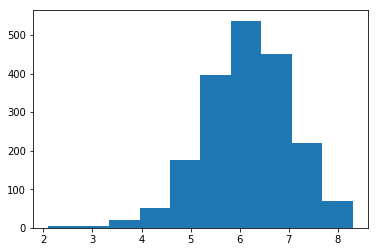

In [9]:
plt.hist(df['vote_average'])
plt.show()

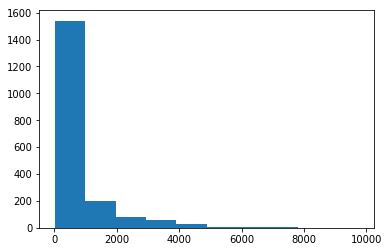

In [10]:
plt.hist(df['vote_count'])
plt.show()

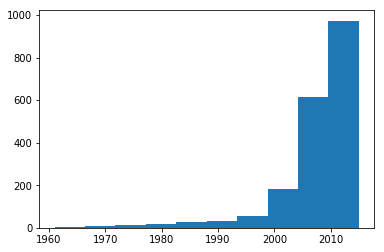

In [11]:
plt.hist(df['release_year'])
plt.show()

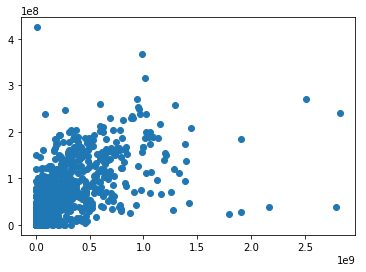

In [12]:
plt.scatter(df['revenue_adj'],df['budget_adj'])

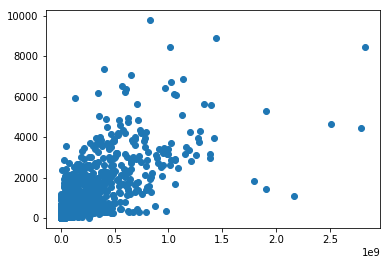

In [13]:
plt.scatter(df['revenue_adj'],df['vote_count'])
plt.show()

In [14]:
df['production_companies'].nunique()

1713

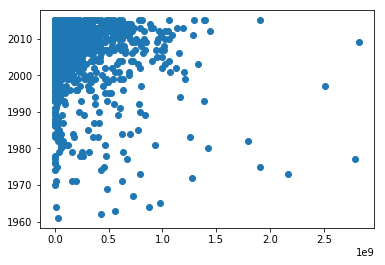

In [15]:
plt.scatter(df['revenue_adj'],df['release_year'])
plt.show()

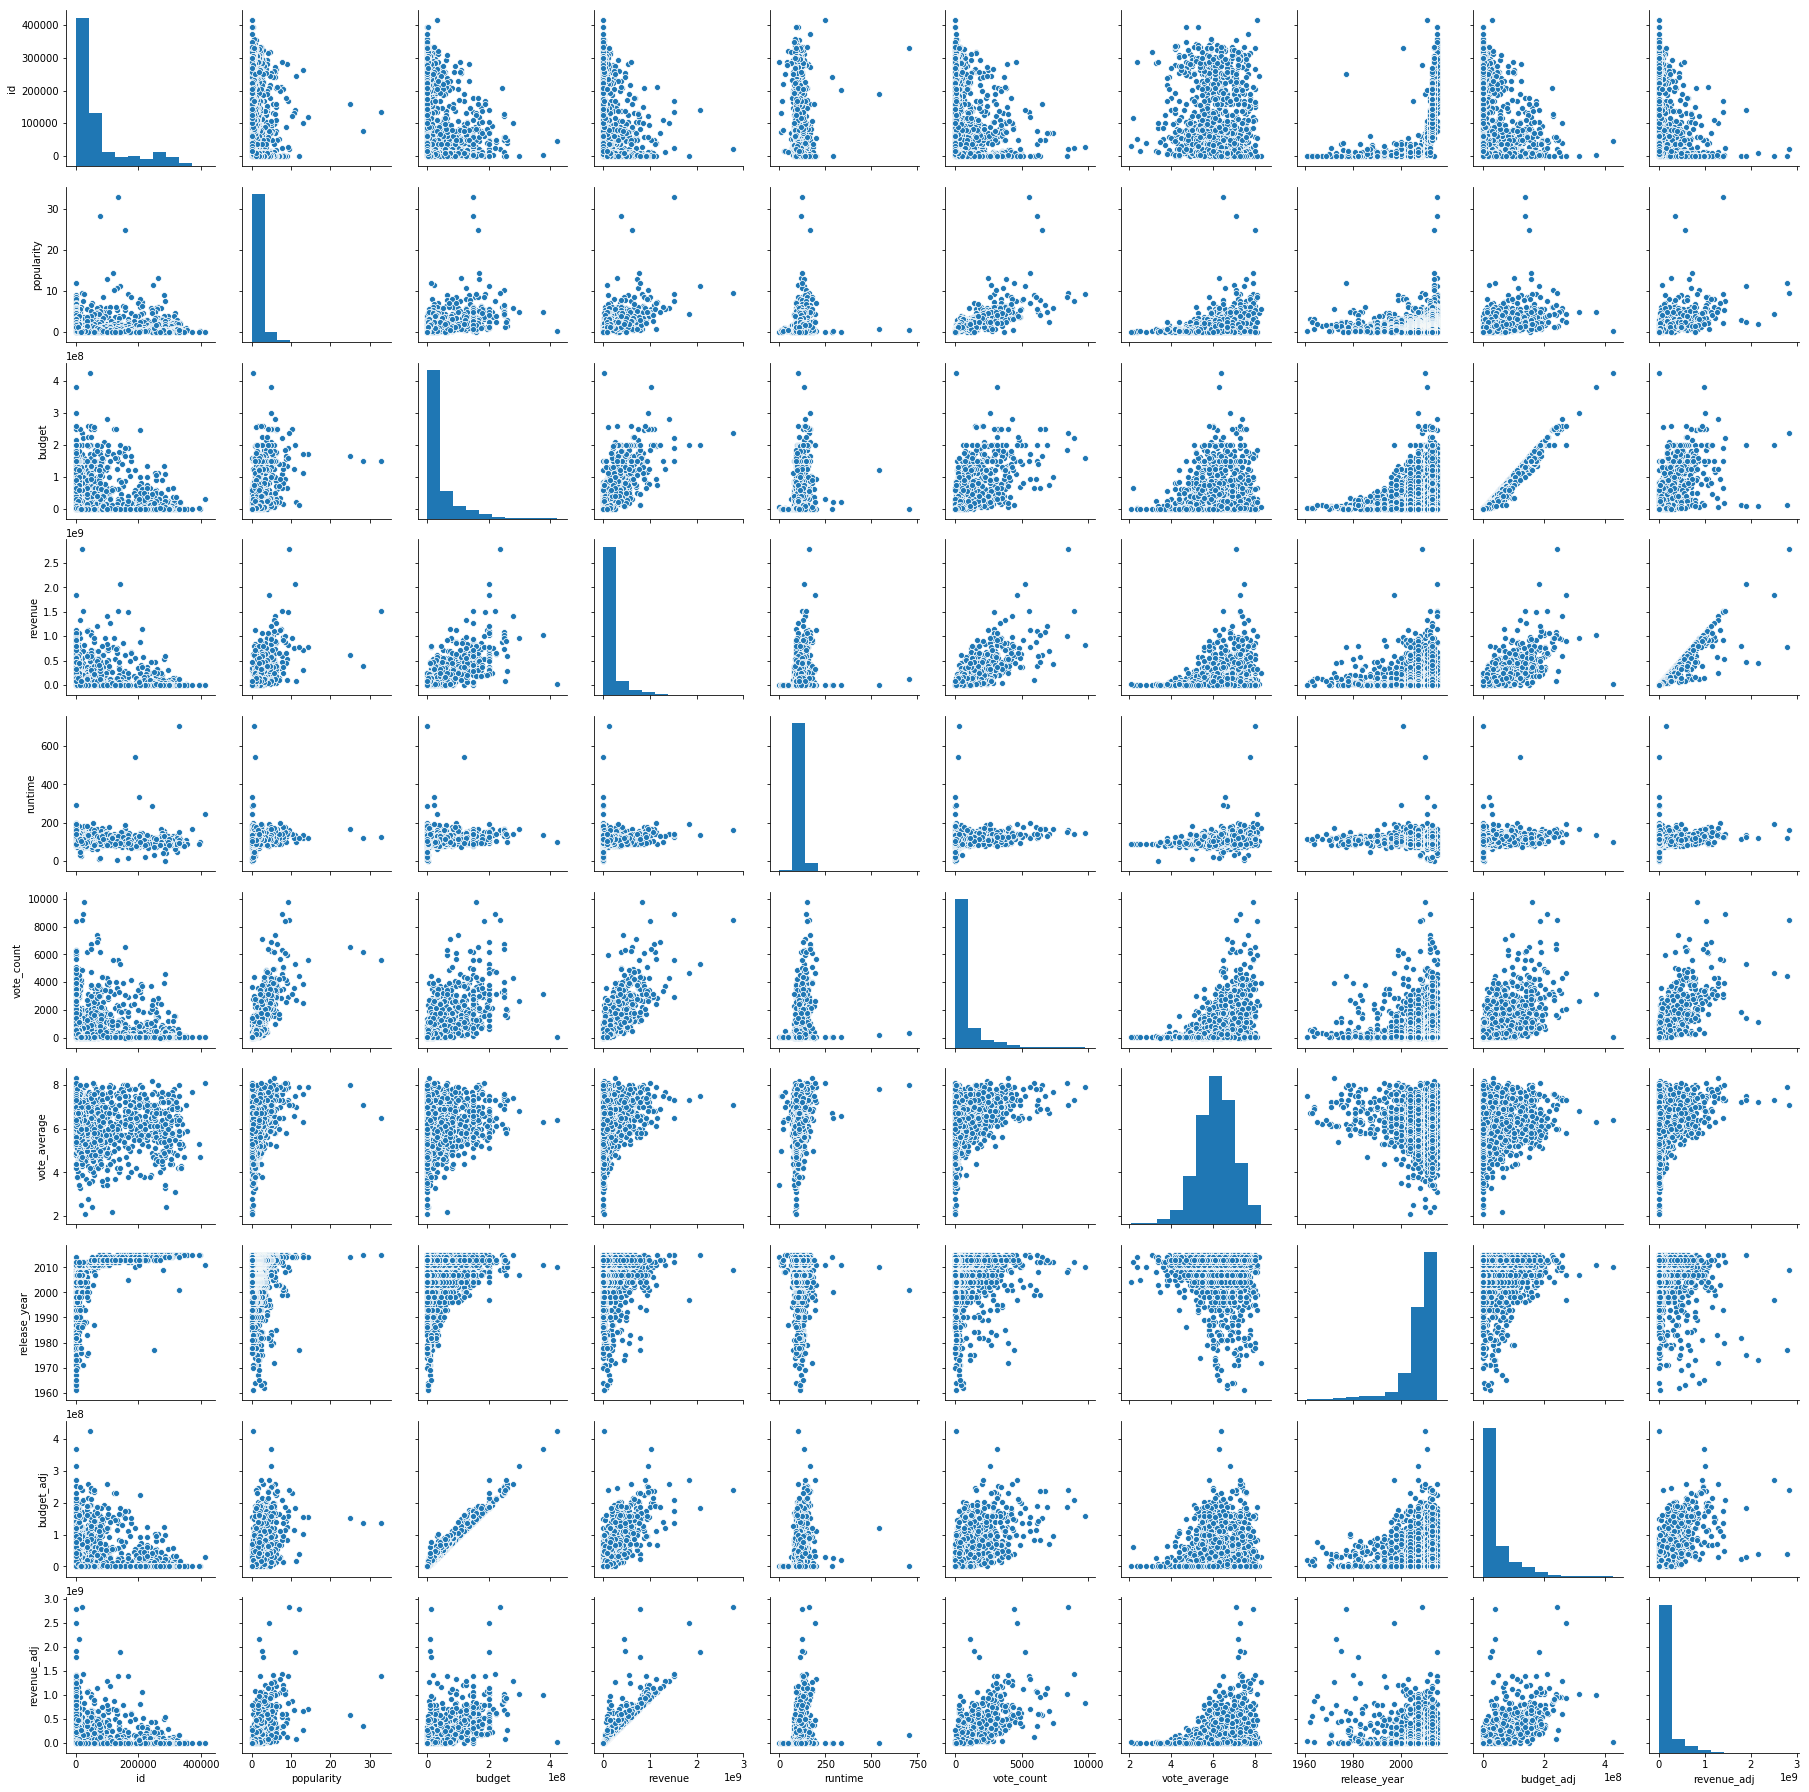

In [15]:
sns.pairplot(df)

# Questions 

## Question 1- What properties are associated with high revenue

From the pair plots above it can be seen vote_count, vote_average and budget has some effect on the revenue. For some low budget movies the revenue generated- this makes sense since low budget movies are genrally not commercial movies.
Vote count also shows a similar trend for movies that genrated less review the vote count is genrally less.
Vote average has different trends. But the point to notice is that all movie which generated a good revenue had a good vote_average.

## Question 2- Did movies which generated a good revenue have a high vote average 


 All movies which generated a good revenue had a good vote_average above 6.5.

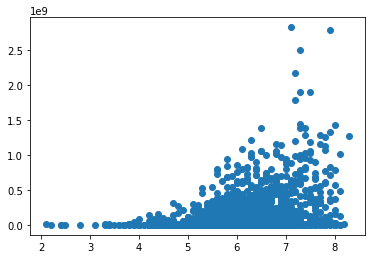

In [16]:
plt.scatter(df['vote_average'],df['revenue_adj'])
plt.show()

# Question 3- What is the effect of release year on revenue?

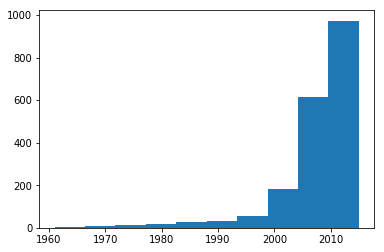

In [13]:
plt.hist(df['release_year'])
plt.show()

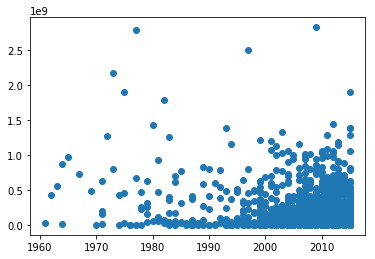

In [14]:
plt.scatter(df['release_year'],df['revenue_adj'])
plt.show()

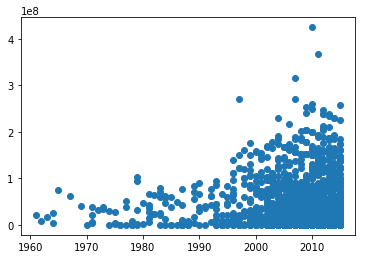

In [15]:
plt.scatter(df['release_year'],df['budget_adj'])
plt.show()

From the vissualizations it can be clearly seen that number of movies releasing has increased over the years.Budget has clearly increased over the years for movies. Revenue does not have any direct effect. Good movies grossed high revenue before as well as now. This proves the fact that only budget is not the only criteria. The content of the film is also important.

<a id='conclusions'></a>
## Conclusions
Data Wrangling, Data Cleaning and Exploratory Data Analysis was done for the TMD_DB movie set was done. Questions were designed and answered using Data Analysis and Data Vissualization methods.